In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets.widgets import interact, FloatSlider
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

pi = np.pi

plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (40, 10)
plt.rcParams['lines.linewidth'] = 2.0

# Aufgabe 10: Kontinuierliche Zufallsvariablen

Gegeben seien die Zufallsvariablen $X$ und $Y$ mit der gemeinsamen Verbundverteilungsdichtefuntion

\begin{align}
    p_{X,Y}(x,y) = \frac{1}{8} \mathrm{rect} \left( \frac{x}{4} \right) \mathrm{e}^{-|y|}.
\end{align}

#### Graph der Verbundverteilungsdichtefunktion $p_{X,Y}(x,y)$:

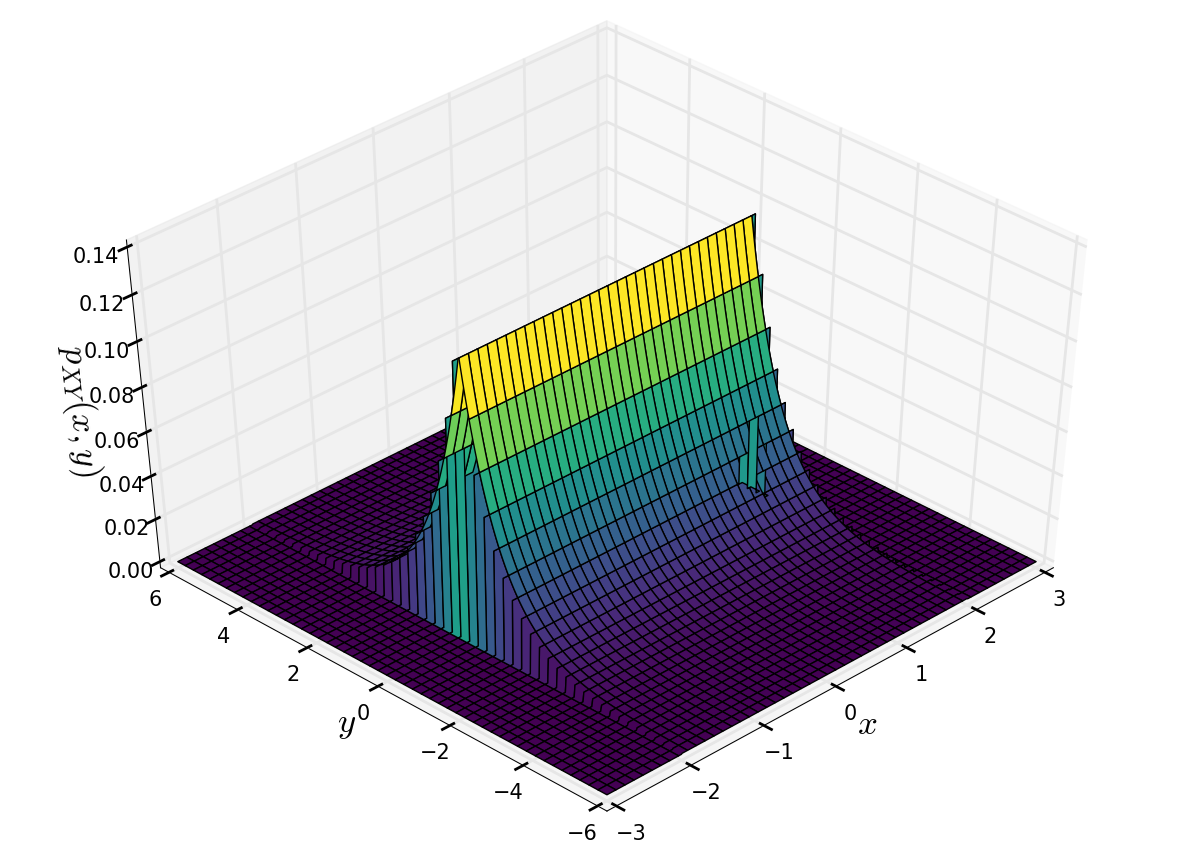

In [2]:
x1d = np.linspace(-3, 3, 500)
y1d = np.linspace(-6, 6, 500)
x, y = np.meshgrid(x1d, y1d)

def p_XY(x,y):
    return 1/8*np.exp(-np.abs(y))*(np.abs(x) < 2)

fig = plt.figure(figsize=(15, 15/np.sqrt(2)))
fig.canvas.set_window_title('Verbundverteilungsdichtefunktion')
ax = fig.gca(projection='3d')
surf1 = ax.plot_surface(x, y, p_XY(x,y), cmap='viridis')

# Achsbeschriftungen
ax.grid(True)

ax.set_xlim((-3, 3))
ax.invert_xaxis()
ax.set_xlabel(r'$x$', fontsize=25)

ax.set_ylim((-6, 6))
ax.invert_yaxis()
ax.set_ylabel(r'$y$', fontsize=25)

ax.set_zlabel(r'$p_{XY}(x,y)$', fontsize=25)
ax.view_init(45, 45)

## 10.1
Berechnen Sie die Randverteilungsdichtefunktionen $p_X(x)$ und $p_Y(y)$.

\begin{align}
    p_X(x) &= \int_{-\infty}^{\infty} p_{X,Y}(x,y) \mathrm{d}y \\
    &= \frac{1}{8}\mathrm{rect} \left( \frac{x}{4} \right) \int_{-\infty}^{\infty} \mathrm{e}^{-|y|} \mathrm{d}y \\
    &= \frac{1}{8}\mathrm{rect} \left( \frac{x}{4} \right) \left[- \mathrm{e}^{-|y|} \right]_{-\infty}^{\infty} \\
    &= \frac{1}{8}\mathrm{rect} \left( \frac{x}{4} \right) (1 - (-1)) \\
    &= \frac{1}{4}\mathrm{rect} \left( \frac{x}{4} \right).
\end{align}

Die Zufallsvariable $X$ folgt also einer [Gleichverteilung](https://de.wikipedia.org/wiki/Stetige_Gleichverteilung) im Intervall $[-2, 2]$.

#### Graph von $p_X(x)$:

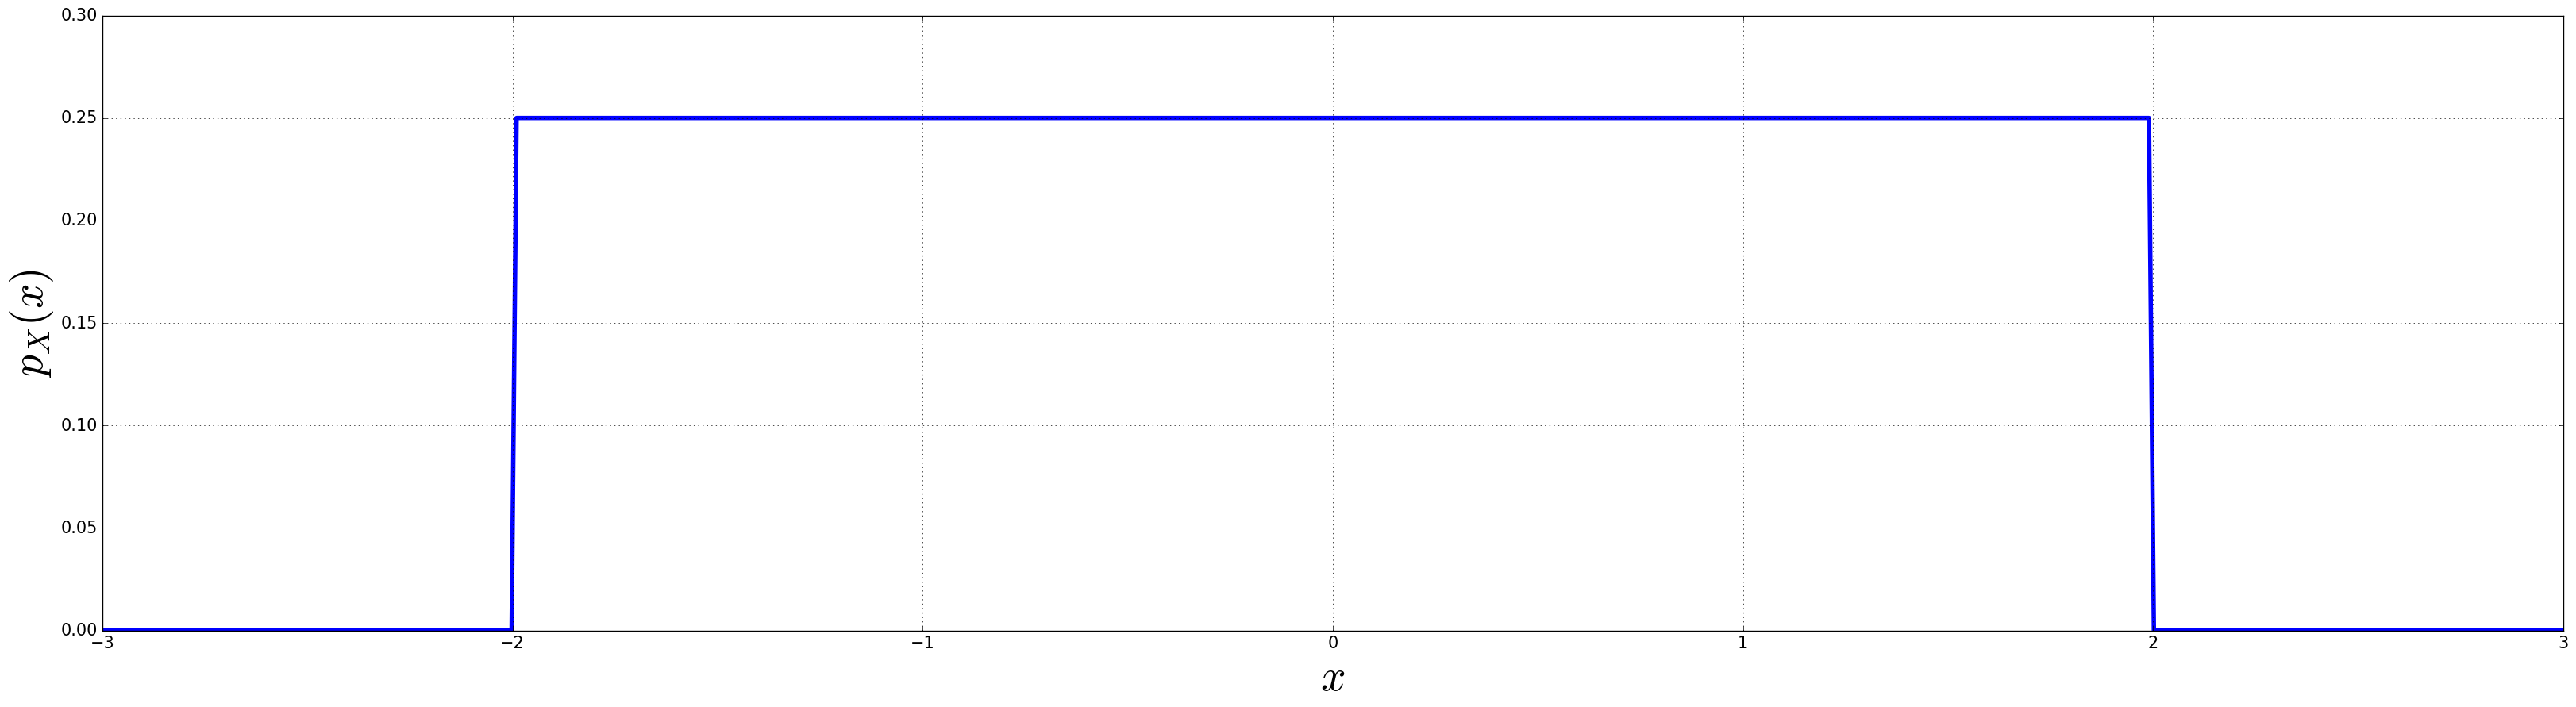

In [3]:
p_x = 1/4*(np.abs(x1d) < 2)
plt.plot(x1d, p_x, lw=4)
plt.xlim((-3, 3))
plt.ylim((0, 0.3))
plt.xlabel(r'$x$', fontsize=40)
plt.ylabel(r'$p_X(x)$', fontsize=40)
plt.grid(True)

\begin{align}
    p_Y(y) &= \int_{-\infty}^{\infty} p_{X,Y}(x,y) \mathrm{d}x \\
    &= \frac{1}{8} \mathrm{e}^{-|y|} \int_{-\infty}^{\infty} \mathrm{rect} \left( \frac{x}{4} \right)   \mathrm{d}x \\
    &= \frac{1}{8} \mathrm{e}^{-|y|} \int_{-2}^{2}\mathrm{d}x \\
    &= \frac{1}{8} \mathrm{e}^{-|y|} (2 - (-2)) \\
    &= \frac{1}{2} \mathrm{e}^{-|y|}
\end{align}

Die Zufallsvariable $Y$ folgt also einer [Laplace-Verteilung](https://de.wikipedia.org/wiki/Laplace-Verteilung) (mit Skalenparameter $\sigma=1$ und Lageparameter $\mu=0$).

#### Graph von $p_Y(y)$:

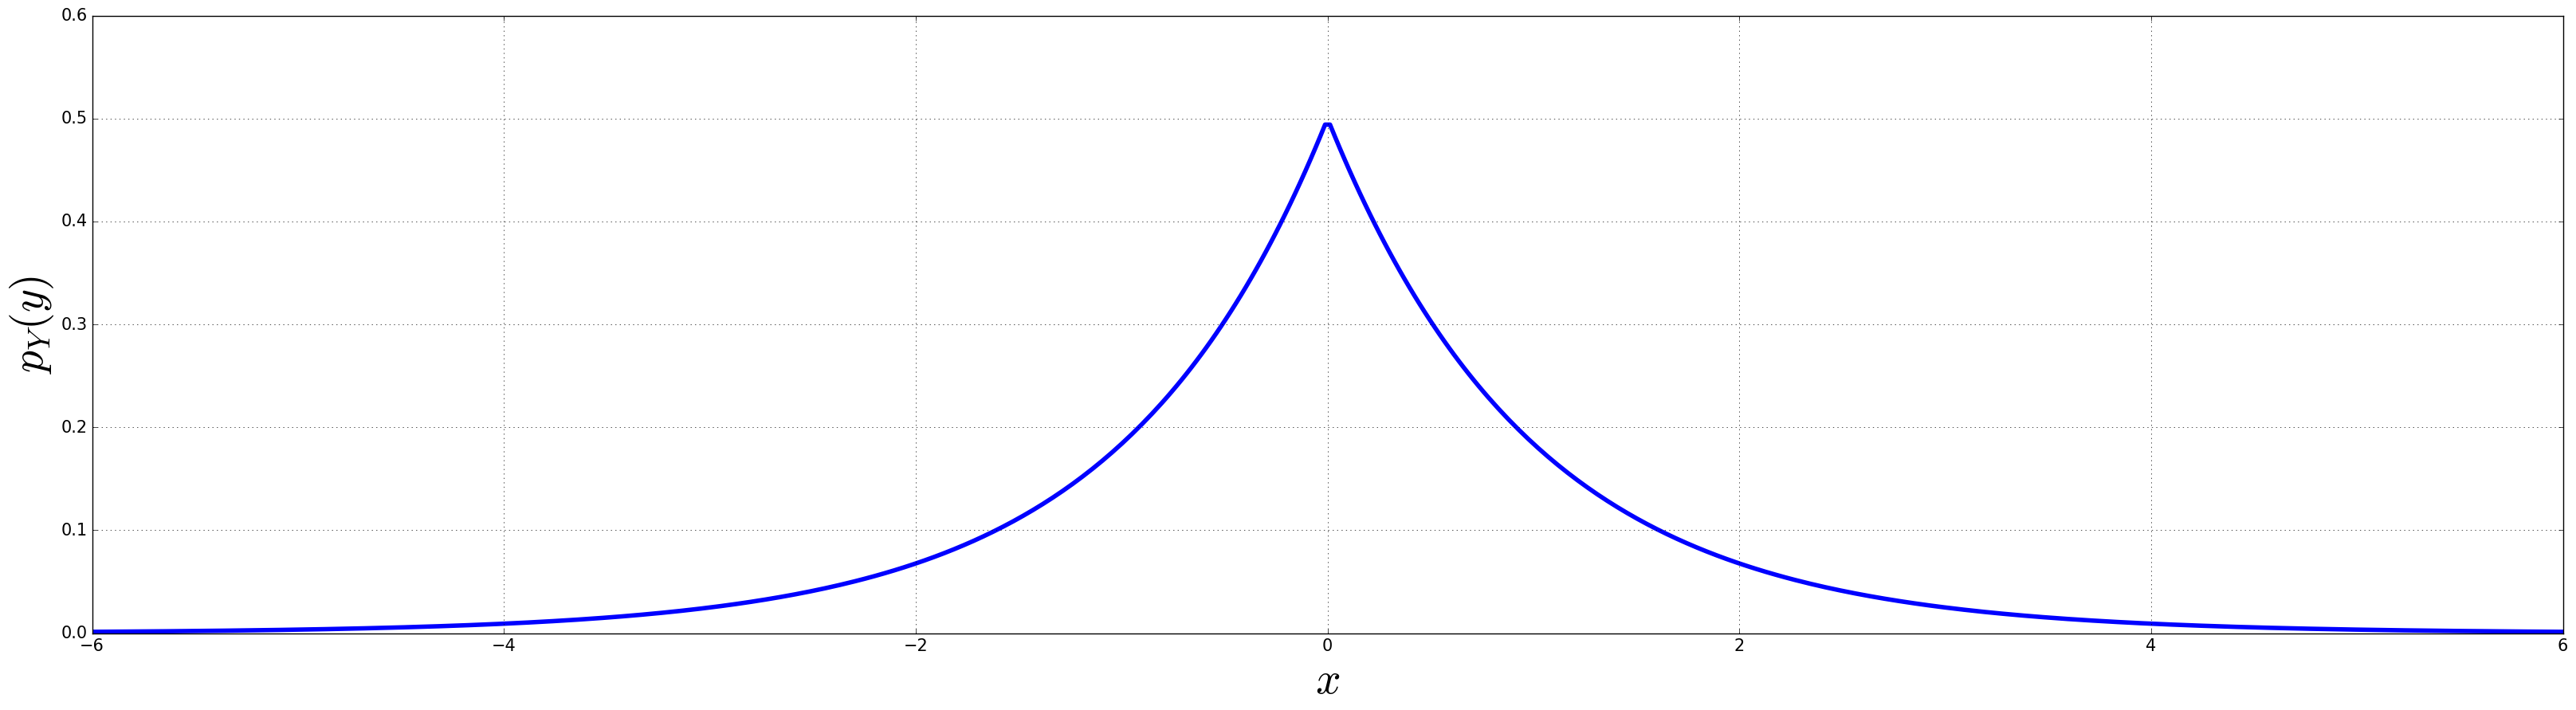

In [4]:
p_y = 1/2*(np.exp(-np.abs(y1d)))
plt.plot(y1d, p_y, lw=4)
plt.xlim((-6, 6))
plt.ylim((0, 0.6))
plt.xlabel(r'$x$', fontsize=40)
plt.ylabel(r'$p_Y(y)$', fontsize=40)
plt.grid(True)

## 10.2:

Berechnen Sie die Verteilungsdichtefunktion $P_Y(y) = \mathrm{Pr}(Y \leq y)$ und skizzieren Sie diese.

\begin{align}
    P_Y(y) &= \int_{-\infty}^{y} p_y(v) \mathrm{d}v \\
            &= \frac{1}{2} \int_{-\infty}^{y} \mathrm{e}^{-|v|} \mathrm{d}v \\
\end{align}

#### Fallunterscheidung:
1) $y < 0$: $|v| = -v$

\begin{align}
    P_Y(y) &= \frac{1}{2} \int_{-\infty}^{y} \mathrm{e}^{v} \mathrm{d}v \\
            &= \frac{1}{2} \left[ \mathrm{e}^{v} \right]_{-\infty}^{y} \\
            &= \frac{1}{2} \mathrm{e}^{y}
\end{align}

2) $y > 0$: $|v| = v$

\begin{align}
    P_Y(y) &= P_Y(0) + \frac{1}{2} \int_{0}^{y} \mathrm{e}^{-v} \mathrm{d}v \\
            &= \frac{1}{2} + \frac{1}{2} \left[- \mathrm{e}^{-v} \right]_{0}^{y} \\
            &= \frac{1}{2} + \frac{1}{2} \left( 1- \mathrm{e}^{-y} \right) \\
            &= 1 - \frac{1}{2} \mathrm{e}^{-y}
\end{align}

Insgesamt:

\begin{align}
    P_Y(y) = \begin{cases}
        \frac{1}{2} \mathrm{e}^{y} & y \le 0 \\
        1 - \frac{1}{2} \mathrm{e}^{-y} & y \ge 0
    \end{cases}
\end{align}

#### Graph von $P_Y(y)$:

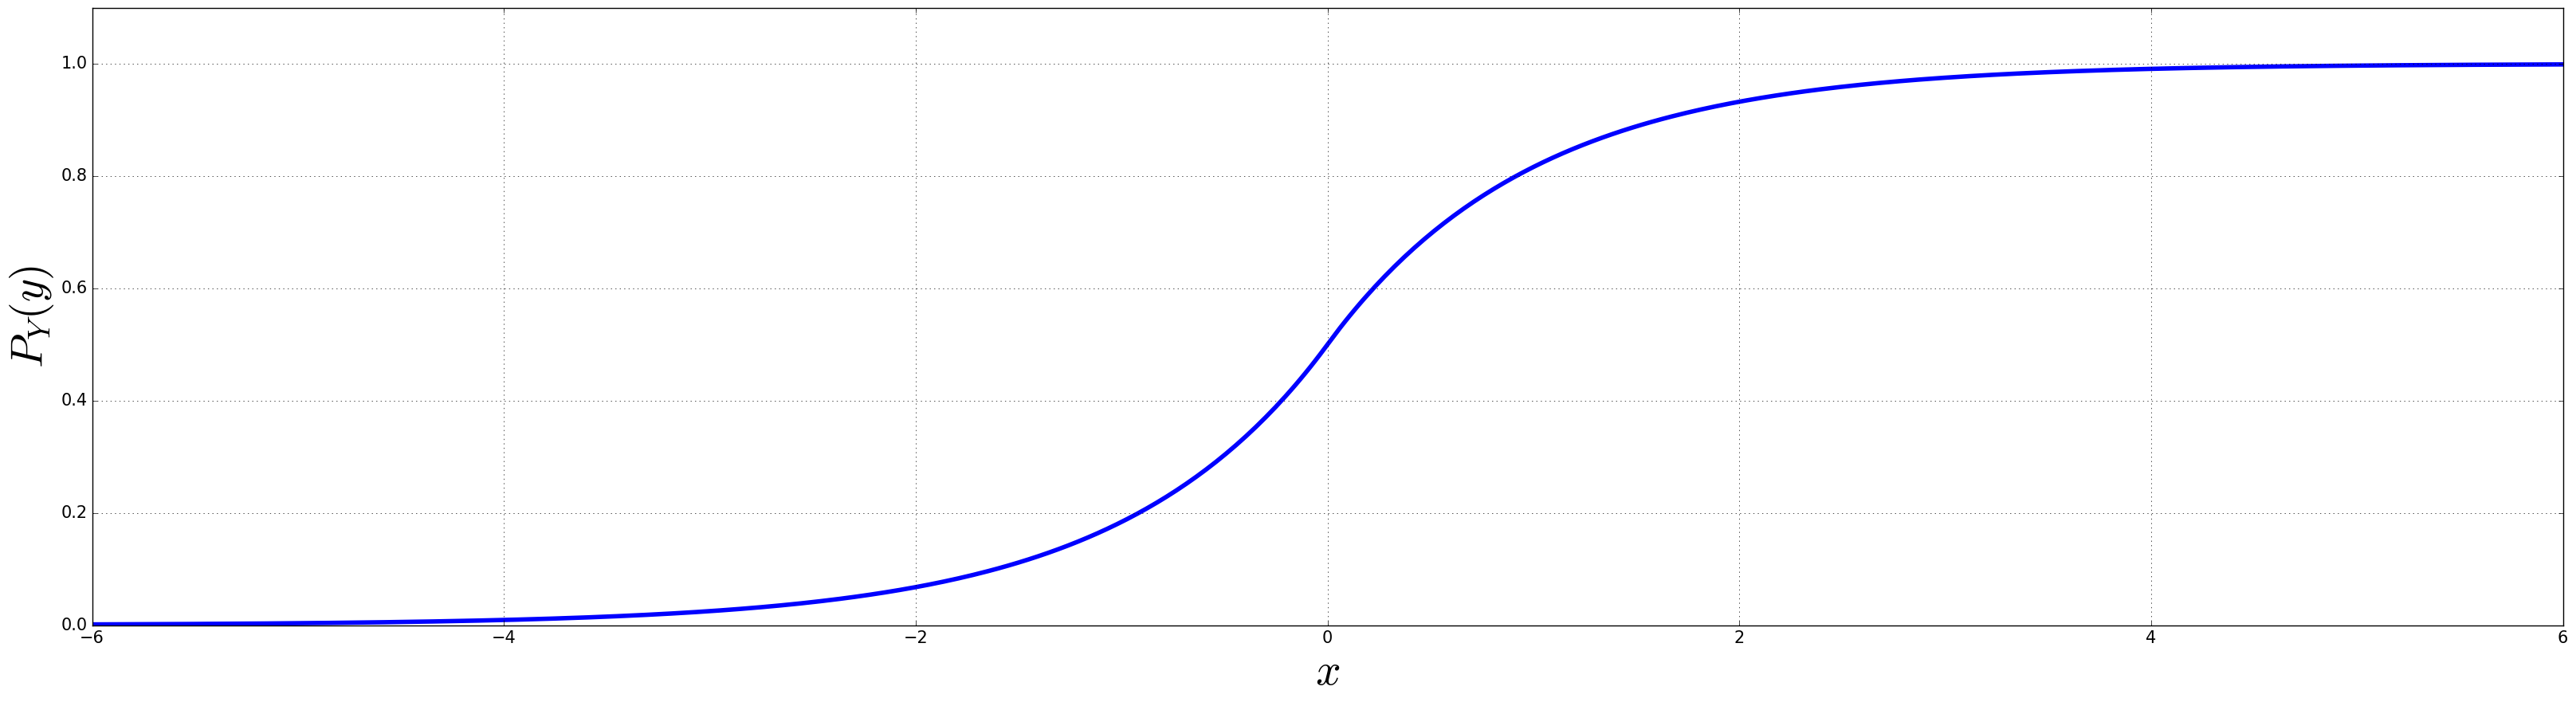

In [5]:
def CDF_Y(y):
    return 1/2*np.exp(y)*(y <=0) + (1 - 1/2*np.exp(-y))*(y > 0)

plt.plot(y1d, CDF_Y(y1d), lw=4)
plt.xlim((-6, 6))
plt.ylim((0, 1.1))
plt.xlabel(r'$x$', fontsize=40)
plt.ylabel(r'$P_Y(y)$', fontsize=40)
plt.grid(True)

## 10.3

Berechnen sie die Wahrscheinlichkeit, dass die Zufallsvariable $Y$ einen Wert $|y| < 1$ annimmt.

\begin{align}
    \mathrm{Pr}(|y| < 1) &= \mathrm{Pr}(-1 < Y < 1) \\
                &= P_Y(1) - P_Y(-1) \\
                &= \left( 1 - \frac{1}{2} \mathrm{e}^{-1} \right) - \left( \frac{1}{2} \mathrm{e}^{-1} \right) \\
                &= 1 - \mathrm{e}^{-1}
\end{align}

In [6]:
print('Wahrscheinlichkeit Pr(|Y| < 1) = {:1.3f}'.format(1 - np.exp(-1)))

Wahrscheinlichkeit Pr(|Y| < 1) = 0.632


#### 10.4:

Berechnen sie die Mittelwerte von $X$ und $Y$.

\begin{align}
    \mathrm{E}\left[X\right] &= \int_{-\infty}^{\infty} x \cdot p_X(x) \mathrm{d}x \\
    &= \frac{1}{4}\int_{-2}^{2} x \mathrm{d}x \\
    &= \frac{1}{8} \left[ x^2 \right]_{-2}^{2} = 0.
\end{align}

\begin{align}
    \mathrm{E}\left[ Y \right] &= \int_{-\infty}^{\infty} y \cdot p_Y(y) \mathrm{d}y \\
    &= \frac{1}{2} \int_{-\infty}^{\infty} y \cdot \mathrm{e}^{-|y|} \mathrm{d}y \\
    &= 0 \text{ (Da Integrand ungerade Funktion.)}
\end{align}

## 10.5:

Sind die Zufallsvariablen $X$ und $Y$ korreliert?

Die Verbundverteilungsdichte lässt sich in die Randverteilungsdichten faktorisieren:

\begin{align}
    p_{X,Y}(x,y) = \frac{1}{8} \mathrm{rect} \left( \frac{x}{4} \right) \mathrm{e}^{-|y|}
    = \left( \frac{1}{4} \mathrm{rect} \left( \frac{x}{4} \right) \right) \left(\frac{1}{2} \mathrm{e}^{-|y|} \right)
    = p_X(x) \cdot p_Y(y)
\end{align}

Damit sind die Zufallsvariablen $X$ und $Y$ statistisch unabhängig, was auch die Unkorreliertheit impliziert.

## Teil II:



Gegeben sei nun zusätzlich die Zufallsvariable $Z$ mit der bedingten Verteilungsdichtefunktion

\begin{align}
    p_{Z|X}(z|x) = p_Y(y=z - x^2)
\end{align}

In [7]:
x2d = np.linspace(0, 2, 500)
z1d = np.linspace(-3, 6, 1000)
x2, z = np.meshgrid(x2d, z1d)

def p_Z_given_X(z, x):
    return 1/2*np.exp(-np.abs(z - x**2))

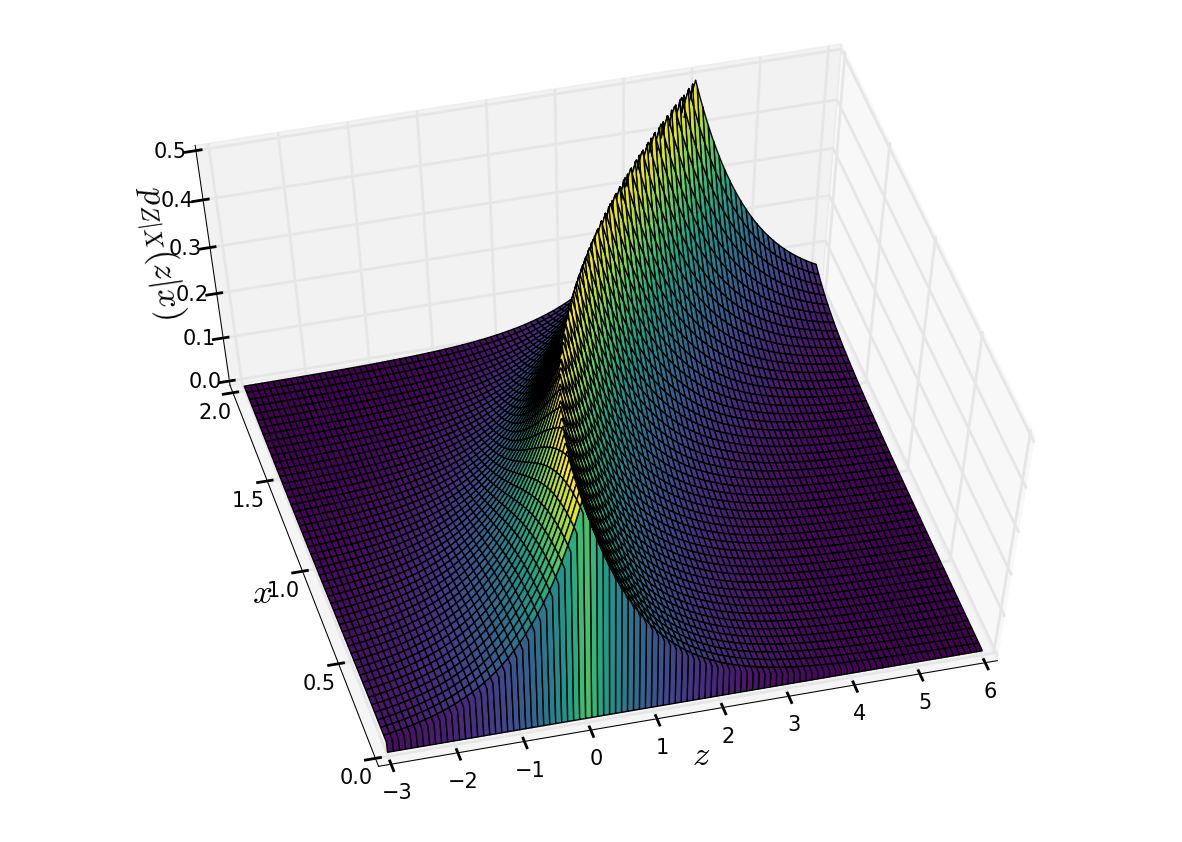

In [8]:
fig = plt.figure(figsize=(15, 15/np.sqrt(2)))
fig.canvas.set_window_title('Verbundverteilungsdichtefunktion')
ax = fig.gca(projection='3d')
surf1 = ax.plot_surface(z, x2, (x2 > 0)*p_Z_given_X(z, x2), cmap='viridis')

# Achsbeschriftungen
ax.grid(True)

ax.set_xlim((-3, 6))
ax.invert_xaxis()
ax.set_xlabel(r'$z$', fontsize=25)

ax.set_ylim((0, 2))
ax.invert_yaxis()
ax.set_ylabel(r'$x$', fontsize=25)

ax.set_zlabel(r'$p_{Z|X}(z|x)$', fontsize=25)
ax.view_init(60, 75)

#### Erklärung:

Ist die Zufallsvariable $X$ gegeben, wird dadurch eine Parabel als Ortskurve beschrieben, auf der die Maxima der Verteilungen für $Z\ |\ X{=}x$ liegen:

\begin{align}
    p_{Z|X}(z|x) = \frac{1}{2}\mathrm{e}^{-|z - x^2|}
\end{align}

Die Zufallsvariable $Z$ ist also ebenfalls [laplaceverteilt](https://de.wikipedia.org/wiki/Laplace-Verteilung), aber mit Lageparameter $\mu = x^2$.

## 10.6:

Sind die Zufallsvariablen $X$ und $Z$ statistisch unabhängig?

$X$ und $Z$ können nicht statistisch unabhängig sein, denn die bedingte Verteilungsdichte von $Z$ ist abhängig von x.
Damit gilt:

\begin{align}
    p_{z|x}(z|x) &= \frac{p_{X,Z}(x,z)}{p_X(x)} \neq p_Z(z) \\
    \Rightarrow p_{X,Z}(x,z) &\neq p_Z(z) \cdot p_X(x)
\end{align}

Intuition: Da $Z\ |\ X{=}x$ einer Laplaceverteilung mit dem Lageparameter $x^2$ folgt, ist die Verteilung deutlich sichtbar von $x$ abhängig. Dies lässt sich auch mit dem folgenden Graphen visualisieren:

#### Graph von $p_{Z|X}(z|x)$:

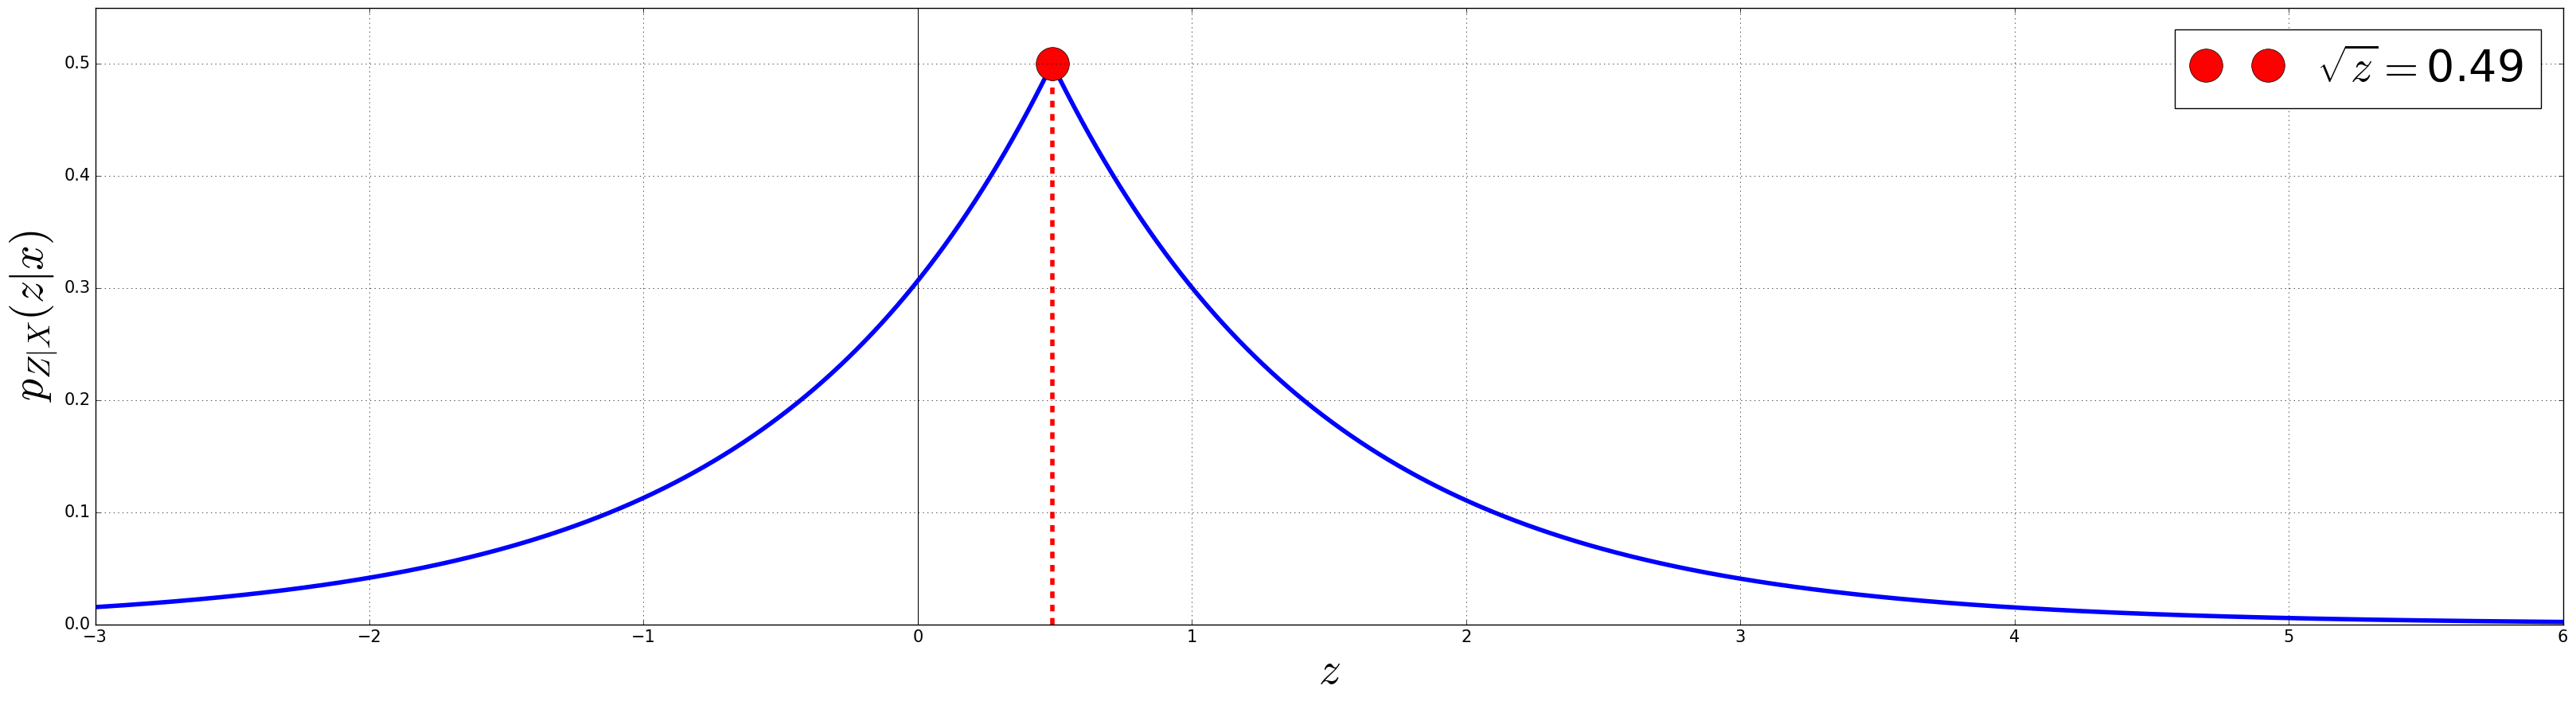

In [9]:
@interact(x_given=FloatSlider(min=-2, max=2, step=0.25, value=0.7))
def plot_p_Z_given_X(x_given):
    z = np.linspace(-6, 6, 10000)
    density = p_Z_given_X(z, x_given)
    plt.figure()
    plt.axvline(lw=0.75, c='k')
    plt.plot(z, density, lw=4)
    plt.plot(x_given**2, 1/2, 'ro', ms=30, 
             label=r'$\sqrt{z}=$'+'{:2.2f}'.format(x_given**2))
    plt.vlines(x_given**2, 0, 1/2, 'r', 'dashed', lw=4)
    plt.axhline(lw=0.75, c='k')
    plt.xlim((-3, 6))
    plt.ylim((0, 0.55))
    plt.xlabel(r'$z$', fontsize=40)
    plt.ylabel(r'$p_{Z|X}(z|x)$', fontsize=40)
    plt.legend(fontsize=40)
    plt.grid(True);

## 10.7:
Drücken sie die Verbundverteilungsdichtefunktion $p_{X,Z}(x,z)$ mit Hilfe der beiden Verteilungsdichtefunktionen $p_{Z|X}(z|x)$ und $p_X(x)$ aus.

Mit der Definition der bedingten Verteilungsdichtefunktion gilt:

\begin{align}
    p_{Z|X}(z|x) &= \frac{p_{X,Z}(x,z)}{p_X(x)} \\
    \Rightarrow p_{X,Z}(x,z) &= p_{Z|X}(z|x) \cdot p_X(x) = p_Y(z-x^2) \cdot p_X(x) \\
    &=\frac{1}{2}\mathrm{e}^{-|z - x^2|} \cdot \frac{1}{4}\mathrm{rect} \left( \frac{x}{4} \right)
\end{align}

## 10.8:
Zeigen Sie, dass der bedingte Erwartungswert $\mathrm{E}\left[ Z | X \right]$ durch 

\begin{align}
    \mathrm{E}\left[ Z | X \right] = x^2
\end{align}

gegeben ist.

Dazu wird zunächst ausgenutzt, dass $\mathrm{E}\left[ X + c \right] = \mathrm{E}\left[X \right] + c$ gilt:

\begin{align}
    \mathrm{E}\left[ Z | X \right] &= \mathrm{E}\left[ Z - x^2| X \right] + x^2 \\
    &= \int_{-\infty}^{\infty} (z - x^2)\ p_{Z|X}(z|x) \ \mathrm{d}z \  + x^2\\
    &= \frac{1}{2} \int_{-\infty}^{\infty} (z - x^2)\ \mathrm{e}^{-|z - x^2|} \ \mathrm{d}z  \  + x^2 
    \qquad \left| \begin{matrix} u = z-x^2 \\ \mathrm{d}u = \mathrm{d}z \\ \text{Grenzen bleiben} \end{matrix}\right.\\
    &= \frac{1}{2} \int_{-\infty}^{\infty} \underbrace{u \ \mathrm{e}^{-|u|}}_{\text{ungerade Funktion}} \ \mathrm{d}z   \  + x^2 \\
    &= 0 \ + x^2 = x^2
\end{align}

Der bedingte Erwartungswert ist also gleich dem Lageparameter der Laplaceverteilung.

## 10.9:
Sind die Zufallsvariablen $X$ und $Z$ korreliert?

Für Unkorreliertheit muss gelten: $\mathrm{E}\left[ X {\cdot} Z \right] \overset{!}{=} \mathrm{E}\left[ X \right]\cdot \mathrm{E}\left[ Z \right]$.

Zunächst wird die rechte Seite der Gleichung bestimmt:     
Wegen $\mathrm{E}\left[ X \right] = 0$ gilt auch $\mathrm{E}\left[ X \right]\cdot\mathrm{E}\left[ Z \right] = 0$.

Für die linke Seite gilt:

\begin{align}
    \mathrm{E}\left[ X {\cdot} Z \right] &= \int_{-\infty}^{\infty} \int_{-\infty}^{\infty}x\cdot z\ p_{X,Z}(x,z) \mathrm{d}x \mathrm{d}z \\
    &= \int_{-\infty}^{\infty} x \left[ \int_{-\infty}^{\infty} z\ p_{Z|X}(z|x) \mathrm{d}z \right] \ p_X(x) \mathrm{d}x \\
    &= \int_{-\infty}^{\infty} x\  \mathrm{E}\left[ Z | X \right] \ p_X(x) \mathrm{d}x \\
    &= \int_{-\infty}^{\infty} \underbrace{x \ x^2 \ \frac{1}{4}\mathrm{rect}\left( \frac{x}{4} \right)}_{\text{ungerade Funktion}} \mathrm{d}x \\
    &= 0.
\end{align}

Die beiden Zufallsvariablen sind also unkorreliert. Dies lässt sich anschaulich so erklären:  
Durch die Korrelation wird ein (näherungsweise) linearer Zusammenhang gemessen.
Der Erwartungswert $\mathrm{E}\left[ Z | X \right]$ ist aber durch $x^2$ gegeben. Die Einflüsse von entgegengesetzten Punkten auf der x-Achse heben sich wegen der Symmetrie von $p_X(x)$ und $(-x)^2 = x^2$ im Mittel also gerade auf.  
Deshalb sind die Zufallsvariablen unkorreliert, aber statistisch abhängig.